# Estimation non paramétrique

Dans cet exercice, nous traitons les données du geyser Old Faithful et nous estimons la densité de probabilité associée à la variable aléatoire de la durée entre deux éruptions.

On étudie les données "Old Faithful Geyser". 

Description: (From R manual):

Waiting time between eruptions and the duration of the eruption for the Old Faithful geyser in Yellowstone National Park, Wyoming, USA.

A data frame with 272 observations on 2 variables:

* eruptions : Eruption time in mins
* waiting : Waiting time to next eruption

## References

* Hardle, W. (1991) Smoothing Techniques with Implementation in S. New York: Springer.

* Azzalini, A. and Bowman, A. W. (1990). A look at some data on the Old Faithful geyser. Applied Statistics 39, 357-365.


## Lecture des données

In [1]:
import openturns as ot
import openturns.viewer as otv

In [2]:
sample = ot.Sample.ImportFromCSVFile("faithful.csv", ",")
sample.setDescription(["Index", "Eruption (min)", "Waiting (min)"])

sample[:10]

class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=10 dimension=3 description=[Index,Eruption (min),Waiting (min)] data=[[1,3.6,79],[2,1.8,54],[3,3.333,74],[4,2.283,62],[5,4.533,85],[6,2.883,55],[7,4.7,88],[8,3.6,85],[9,1.95,51],[10,4.35,85]]

In [3]:
waiting = sample[:, 2]

## Histogramme

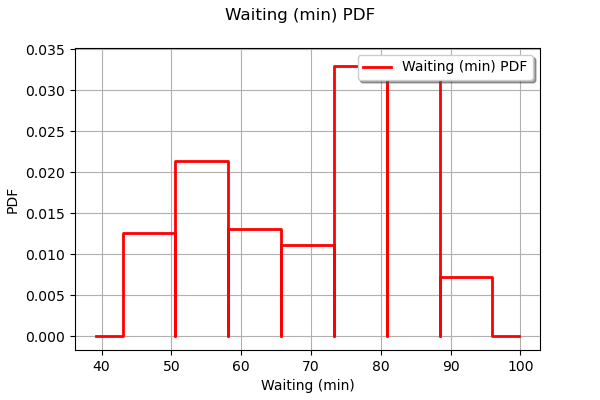

In [4]:
factory = ot.HistogramFactory()

histogram = factory.build(waiting)
histogram.drawPDF()

In [5]:
bandwidth = factory.computeBandwidth(waiting)
bandwidth

9.585431097147616

Configurons la largeur de bande pour fixer une valeur plus petite. 

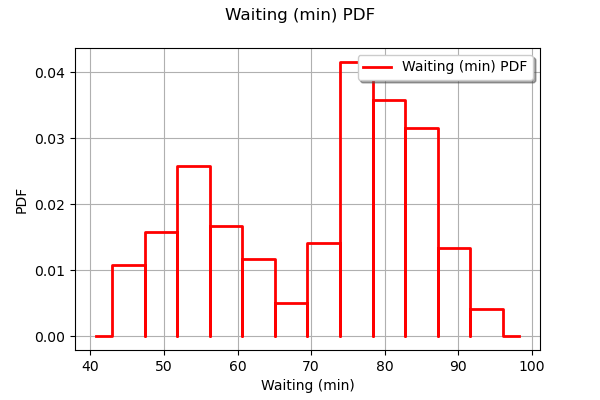

In [6]:
bandwidth = 5.0

histogram = factory.build(waiting, bandwidth)

histogram.drawPDF()

On observe que les données sont représentées plus finement, avec deux modes clairement visibles autour de 55 et 80.

## Estimation à noyau

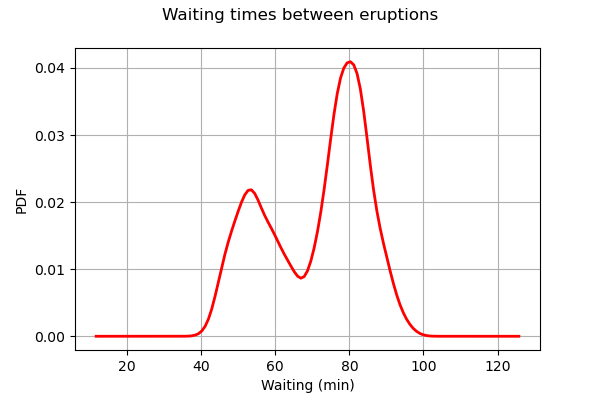

In [7]:
factory = ot.KernelSmoothing()

ks = factory.build(waiting)
graph = ks.drawPDF()
graph.setTitle("Waiting times between eruptions")
graph.setLegends([""])
graph

In [8]:
bandwidth = factory.computeSilvermanBandwidth(waiting)
bandwidth

class=Point name=Unnamed dimension=1 values=[5.79819]

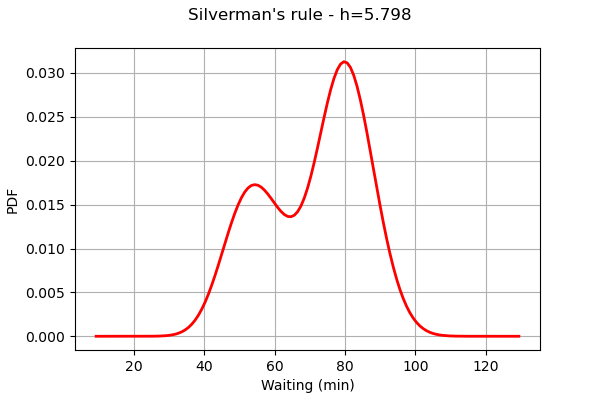

In [9]:
bandwidth = factory.computeSilvermanBandwidth(waiting)
ks = factory.build(waiting, bandwidth)
graph = ks.drawPDF()
graph.setTitle("Silverman's rule - h=%.3f" % (bandwidth[0]))
graph.setLegends([""])

graph

## Comparaison de l'histogramme et du KDE

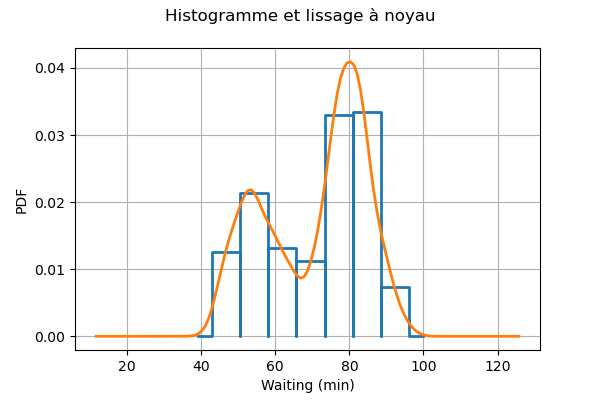

In [10]:
factory = ot.HistogramFactory()
histogram = factory.build(waiting)
graph = histogram.drawPDF()
#
factory = ot.KernelSmoothing()
ks = factory.build(waiting)
curve = ks.drawPDF()
graph.add(curve)
#
graph.setColors(ot.DrawableImplementation_BuildDefaultPalette(2))
graph.setLegends([""])
graph.setTitle("Histogramme et lissage à noyau")
graph

## Exercice 1 : sensibilité à la largeur de bande

Dans cette question, on considère l'échantillon unidimensionnel disponible dans la variable `waiting`.

L'estimation par lissage à noyau peut être sensible à la largeur de bande. Dans cet exercice, on souhaite observer la sensibilité du lissage à noyau à la largeur de bande. Pour cela, on peut utiliser le second argument, optionel, de la méthode `build`. 
- Utiliser la largeur de bande $h$ issue de la règle de Silverman et comparer, sur le même graphique, avec le lissage associé à la largeur de bande $2h$ et $h / 2$. 
- Qu'observez-vous ?


## Exercice 2 : sensibilité à la règle de calcul

Dans cette question, on considère l'échantillon unidimensionnel disponible dans la variable `waiting`.

On peut utiliser plusieurs règles de calcul de la largeur de bande. La librairie fournit 3 méthodes de calcul `computeSilvermanBandwidth`, `computeMixedBandwidth` et `computePluginBandwidth`. 
- Utiliser ces trois règles et comparer les résultats. 
- Qu'observez-vous ?


## Exercice 3 : Données bidimensionnelles

La variable `sample` contient un échantillon bidimensionnel. On souhaite estimer la densité de probabilité bidimensionnelle associée à cet échantillon. 

- Créer la variable `dataset` contenant un échantillon de points bidimensionnel:
```
dataset = sample[:, [1, 2]]
```

- Utiliser la classe `Cloud` pour représenter le nuage de point bidimensionnel. 
- Créer l'estimateur de la densité de probabilité avec la classe `KernelSmoothing`. Puis utiliser la méthode `drawPDF` pour dessiner les iso-valeurs de la densité de probabilité. 

- On souhaite représenter la ligne d'iso densité contenant 90% de la masse probabiliste. Cette ligne correspond à un valeur de densité de probabilité que l'on peut calculer grâce à l'instruction suivante :
```
levelSet, threshold = ks_distribution.computeMinimumVolumeLevelSetWithThreshold(alpha)
```
Utiliser la fonction `drawLevelSetContour2D` pour dessiner l'ensemble de volume minimal contenant 90% de la masse probabiliste de la distribution issue du lissage à noyau.

In [11]:
def drawLevelSetContour2D(
    distribution, numberOfPointsInXAxis, alpha, threshold, sample, margin_factor=0.5
):
    """
    Compute the minimum volume LevelSet of measure equal to alpha and get the
    corresponding density value (named threshold).
    Generate a sample of the distribution and draw it.
    Draw a contour plot for the distribution, where the PDF is equal to threshold.
    """
    X1min = sample[:, 0].getMin()[0]
    X1max = sample[:, 0].getMax()[0]
    delta_X = margin_factor * (X1max - X1min)
    X1min -= delta_X
    X1max += delta_X
    X2min = sample[:, 1].getMin()[0]
    X2max = sample[:, 1].getMax()[0]
    delta_Y = margin_factor * (X2max - X2min)
    X2min -= delta_Y
    X2max += delta_Y
    xx = ot.Box([numberOfPointsInXAxis], ot.Interval([X1min], [X1max])).generate()
    yy = ot.Box([numberOfPointsInXAxis], ot.Interval([X2min], [X2max])).generate()
    xy = ot.Box(
        [numberOfPointsInXAxis, numberOfPointsInXAxis],
        ot.Interval([X1min, X2min], [X1max, X2max]),
    ).generate()
    data = distribution.computePDF(xy)
    graph = ot.Graph("", "X1", "X2", True, "topright")
    labels = ["%.2f%%" % (100 * alpha)]
    contour = ot.Contour(xx, yy, data, [threshold], labels)
    contour.setColor("black")
    sampleSize = sample.getSize()
    graph.setTitle(
        "%.2f%% of the distribution, sample size = %d" % (100 * alpha, sampleSize)
    )
    graph.add(contour)
    cloud = ot.Cloud(sample)
    graph.add(cloud)
    return graph

## Exercice 4 : Intervalle de confiance

Soit $\alpha \in (0, 1)$ un niveau de confiance. D'après [^Müller2000] page 181 on peut obtenir l'intervalle suivante est un intervalle de confiance de niveau $1 - \alpha$:

$$
\left[
\hat{f}_h(x) - z_{1 - \frac{\alpha}{2}}
\sqrt{\frac{\hat{f}_h(x) R(k)}{nh}}, \; 
\hat{f}_h(x) + z_{1 - \frac{\alpha}{2}}
\sqrt{\frac{\hat{f}_h(x) R(k)}{nh}}
\right]
$$

où $n$ est la taille de l'échantillon, $h$ est la largeur de bande, $\hat{f}_h(x)$ est la densité de probabilité estimée par lissage, $z_{1 - \frac{\alpha}{2}}$ est le quantile de niveau $1 - \alpha / 2$ de la loi gaussienne standard et $R(k)$ est la rugosité. 

D'après [^Wasserman2006] page 59, l'intervalle obtenu est plutôt un intervalle de confiance de $\hat{f}_h(x)$, mais pas de $f(x)$. En effet : "In kernel smoothing, we equilibrate the bias and variance terms so that the two are equal. This introduce a nonvanishing term into the Normal limit. The result is that the confidence interval will not be centered around the true function f due to the smoothing bias. The second term does not vanish even with large sample sizes."

[^Müller2000]: Härdle, W., Klinke, S., & Müller, M. (2000). _XploRe—Learning Guide: Learning Guide_. Springer Science & Business Media.

[^Wasserman2006]: Wasserman, L. (2006). All of nonparametric statistics. Springer Science & Business Media.

Questions :

- Implémenter l'intervalle de confiance précédent. 
- Au vu de l'intervalle de confiance, est-il toujours pertinent de prétendre que la distribution est bimodale ?

Pour cela, on peut utiliser le squelette de script suivant, dans lequel on remplacera les sections `TODO` par du code valide.

```python
# Compute pointwise confidence bounds
alpha = 0.05
rugosity = kernel.getRoughness()
sample_size = sample.getSize()
n_points = 100
sample_grid = ot.Sample.BuildFromPoint(np.linspace(30.0, 110.0, n_points))
confidence_interval = ot.Sample(n_points, 2)
for i in range(n_points):
    x = sample_grid[i, 0]
    ks_mean = TODO
    if ks_mean > 0.0:
        ks_sigma = TODO
        ks_estimator = ot.Normal(TODO, TODO)
        interval = ks_estimator.computeBilateralConfidenceInterval(1.0 - alpha)
        lower_bound = interval.getLowerBound()
        upper_bound = interval.getUpperBound()
        confidence_interval[i] = [lower_bound[0], upper_bound[0]]
    else:
        confidence_interval[i] = [ks_mean, ks_mean]

graph = ks_distribution.drawPDF()
graph.setLegends(["KDE"])
curve = ot.Curve(sample_grid, confidence_interval[:, 0])
curve.setLegend("%.0f%% bounds" % (100 * (1.0 - alpha)))
graph.add(curve)
curve = ot.Curve(sample_grid, confidence_interval[:, 1])
graph.add(curve)
graph.setTitle("Waiting times between eruptions")
```